In [9]:
from ogs6py.ogs import OGS
#from ogs import *
#import ogs
import pandas as pd
import vtuIO
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 12})
import std
import tfel.tests
from mtest import *
import os
import math 
import mtest

In [10]:
#os.environ['LD_LIBRARY_PATH'] = "/home/eric/sources/mfront/HypoplasWrapper" 
#!export LD_LIBRARY_PATH="/home/eric/sources/mfront/HypoplasWrapper:$LD_LIBRARY_PATH"
os.environ['LD_LIBRARY_PATH'] = "$(pwd):$LD_LIBRARY_PATH"
!export LD_LIBRARY_PATH=$(pwd):$LD_LIBRARY_PATH

In [12]:

# python object
m = MTest()

# parameters
m.setBehaviour('generic', './src/libBehaviour.so', 'HypoplasticClayModelWrapper')
m.setMaterialProperty('mps[0]', 22.0)
m.setMaterialProperty('mps[1]', 0.01)
m.setMaterialProperty('mps[2]', 0.128)
m.setMaterialProperty('mps[3]', 0.015)
m.setMaterialProperty('mps[4]', 1.51)
m.setMaterialProperty('mps[5]', 0.45)
m.setMaterialProperty('mps[6]', 1.0)
m.setMaterialProperty('mps[7]', 0.0)
m.setMaterialProperty('mps[8]', 0.0)
m.setMaterialProperty('mps[9]', 0.0)
m.setMaterialProperty('mps[10]', 5.0e-5)
m.setMaterialProperty('mps[11]', 0.08)
m.setMaterialProperty('mps[12]', 0.9)
m.setMaterialProperty('mps[13]', 0.0)
m.setMaterialProperty('mps[14]', 1.0)
m.setMaterialProperty('mps[15]', 0.5)
m.setMaterialProperty('mps[16]', 0.0)
m.setMaterialProperty('mps[17]', 3.0)
m.setMaterialProperty('mps[18]', 0.0)
m.setMaterialProperty('mps[19]', 0.0)
m.setMaterialProperty('mps[20]', 0.0)
m.setMaterialProperty('mps[21]', 0.761)

m.setExternalStateVariable('Temperature', 293.15)

#Initializing the stress state
m.setStress([-100.0e3, -100.0e3, -100.0e3, 0.0, 0.0, 0.0])

## --- undrained shear test conditions ---
#m.setImposedStrain('EXX', 0.0)
#m.setImposedStrain('EYY', 0.0)
#m.setImposedStrain('EZZ', 0.0)
#m.setImposedStrain('EXY', {0.0:0.0,100:1.0*math.sqrt(2)})

## --- drained shear test conditions ---
m.setImposedStrain('EXX', 0)
m.setImposedStrain('EYY', 0.0)
m.setImposedStrain('EZZ', 0.0)
m.setImposedStrain('EYZ', 0.0)
m.setImposedStrain('EXZ', 0.0)
m.setImposedStrain('EXY', {0.0:0.0,100:1.0*math.sqrt(2)})#

#m.addEvolution('p', {0 : -275., 100 : -13000})
#m.setNonLinearConstraint('SYY + SXX + SZZ - 3*p','Stress')
m.setTimes([i*0.1 for i in range(0,1000)])

# output file
output_file = 'sheartest.res'
m.setOutputFileName(output_file)

# execute MTest
m.execute()

RuntimeError: ExternalLibraryManager::getInterface: no interface found for entry point 'HypoplasticClayModelWrapper_Tridimensional' in library './src/libBehaviour.so'

In [13]:
# load results
output_file = 'sheartest.res'
results = np.loadtxt(output_file,skiprows=32)

xdata_mtest = [(results[i][4]/math.sqrt(2)) for i in range(len(results))]  # EXZ   4
ydata_mtest = [(results[i][10]/math.sqrt(2)/1e3) for i in range(len(results))]  # SXZ:11 , SXY:10
ydata_1_mtest = [-(results[i][1]) for i in range(len(results))]  # EXX
ydata_2_mtest = [-(results[i][2]) for i in range(len(results))]  # EYY
ydata_3_mtest = [-(results[i][3]) for i in range(len(results))]  # EZZ 
ydata_4_mtest = [-(results[i][4]) for i in range(len(results))]  # EZZ 
ydata_5_mtest = [-(results[i][5]) for i in range(len(results))]  # EZZ 
ydata_6_mtest = [-(results[i][6]) for i in range(len(results))]  # EZZ 



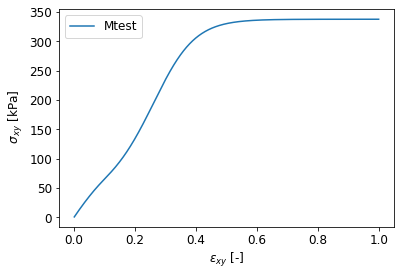

In [16]:
## --- shear stress - strain - plot --- ##
plt.plot(xdata_mtest, ydata_mtest, label='Hypoplastic Model Clays')


plt.legend()
plt.xlabel('$\epsilon_{xy}$ [-]')
plt.ylabel(' $\sigma_{xy}$ [kPa]')
plt.savefig('sheartest.png',dpi=300)
plt.show()
